# Probability and Statistics-ലേക്കുള്ള പരിചയം
ഈ നോട്ട്‌ബുക്കിൽ, നാം മുമ്പ് ചർച്ച ചെയ്ത ചില ആശയങ്ങളുമായി കളിക്കും. Probability and statistics-ലെ പല ആശയങ്ങളും Python-ലെ ഡാറ്റ പ്രോസസ്സിംഗിനുള്ള പ്രധാന ലൈബ്രറികളായ `numpy` ഉം `pandas` ഉം എന്നിവയിൽ നന്നായി പ്രതിനിധീകരിച്ചിരിക്കുന്നു.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Random Variables and Distributions
0 മുതൽ 9 വരെ ഉള്ള ഒരു യൂണിഫോം വിതരണത്തിൽ നിന്ന് 30 മൂല്യങ്ങളുടെ ഒരു സാമ്പിൾ വരച്ചെടുക്കുന്നതിൽ നിന്ന് തുടങ്ങാം. നാം ശരാശരി കൂടാതെ വ്യത്യാസവും കണക്കാക്കും.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


സാമ്പിളിൽ എത്ര വ്യത്യസ്ത മൂല്യങ്ങൾ ഉണ്ടെന്ന് ദൃശ്യമായി അളക്കാൻ, നാം **ഹിസ്റ്റോഗ്രാം** വരയ്ക്കാം:


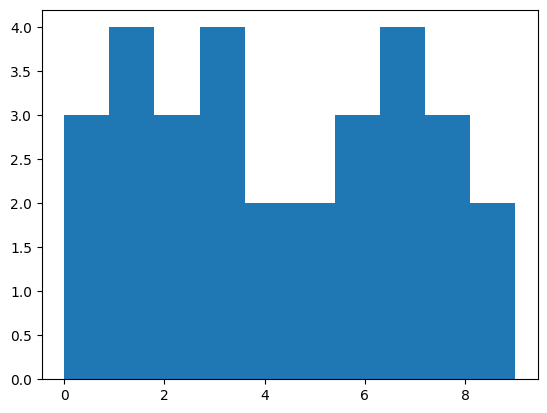

In [119]:
plt.hist(sample)
plt.show()

## യഥാർത്ഥ ഡാറ്റ വിശകലനം ചെയ്യൽ

യഥാർത്ഥ ലോക ഡാറ്റ വിശകലനം ചെയ്യുമ്പോൾ ശരാശരി (Mean)യും വ്യതിയാനവും (variance) വളരെ പ്രധാനമാണ്. [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights) എന്നതിൽ നിന്നുള്ള ബേസ്ബോൾ കളിക്കാരുടെ ഡാറ്റ നമുക്ക് ലോഡ് ചെയ്യാം.


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> നാം ഡാറ്റാ വിശകലനത്തിനായി [**Pandas**](https://pandas.pydata.org/) എന്ന പാക്കേജ് ഇവിടെ ഉപയോഗിക്കുന്നു. Pandas-ഉം Python-ൽ ഡാറ്റയുമായി പ്രവർത്തിക്കുന്നതും ഈ കോഴ്സിൽ പിന്നീട് കൂടുതൽ സംസാരിക്കും.

വയസിന്റെ, ഉയരത്തിന്റെ, ഭാരം എന്നിവയുടെ ശരാശരി മൂല്യങ്ങൾ കണക്കാക്കാം:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

ഇപ്പോൾ ഉയരത്തിൽ ശ്രദ്ധ കേന്ദ്രീകരിച്ച്, സ്റ്റാൻഡേർഡ് ഡിവിയേഷൻയും വ്യത്യാസവും കണക്കാക്കാം:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


സാധാരണ മൂല്യത്തിന് പുറമേ, മധ്യകമൂല്യവും ക്വാർട്ടൈലുകളും നോക്കുന്നത് ബുദ്ധിമുട്ടില്ല. അവയെ **ബോക്സ് പ്ലോട്ട്** ഉപയോഗിച്ച് ദൃശ്യവൽക്കരിക്കാം:


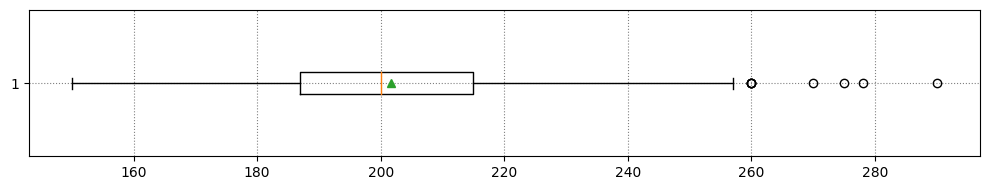

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

നാം നമ്മുടെ ഡാറ്റാസെറ്റിന്റെ ഉപസമൂഹങ്ങളുടെ ബോക്സ് പ്ലോട്ടുകളും ഉണ്ടാക്കാം, ഉദാഹരണത്തിന്, കളിക്കാരന്റെ റോളിന്റെ അടിസ്ഥാനത്തിൽ ഗ്രൂപ്പുചെയ്ത്.


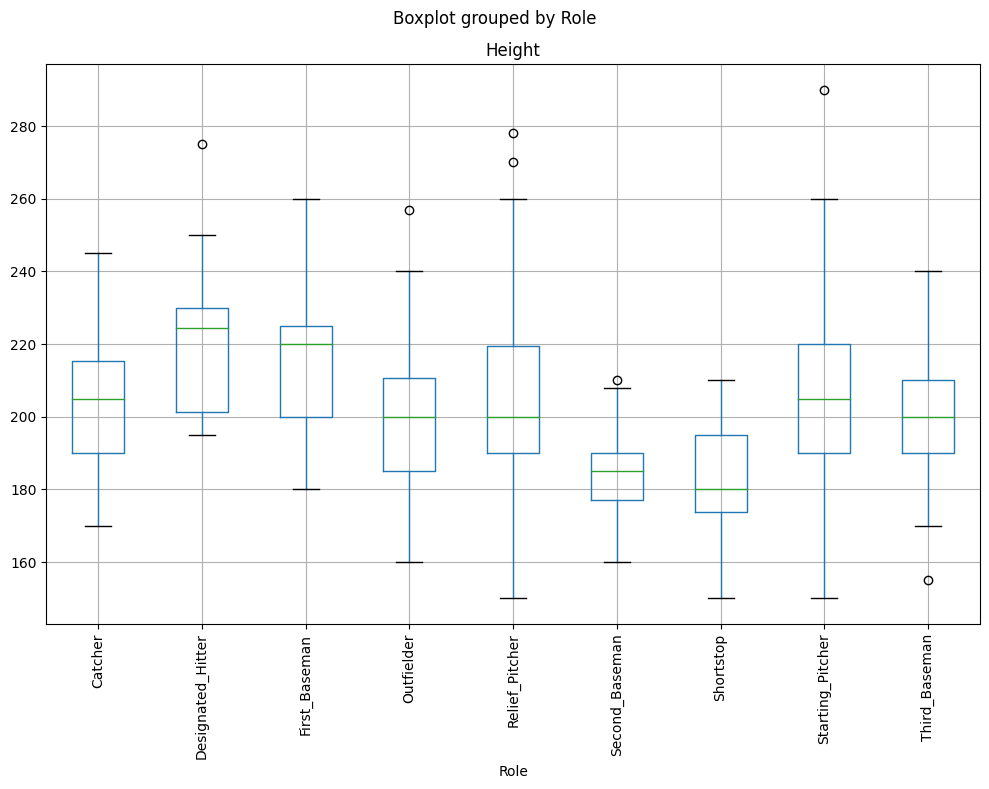

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **കുറിപ്പ്**: ഈ രേഖാചിത്രം സൂചിപ്പിക്കുന്നത്, ശരാശരിയിൽ, ഫസ്റ്റ് ബേസ്മാനുകളുടെ ഉയരം സെക്കന്റ് ബേസ്മാനുകളുടെ ഉയരത്തേക്കാൾ കൂടുതലാണെന്ന്. പിന്നീട് നാം ഈ ഹിപോത്തസിസ് കൂടുതൽ ഔപചാരികമായി പരിശോധിക്കുന്നതും, നമ്മുടെ ഡാറ്റ സ്റ്റാറ്റിസ്റ്റിക്കായി പ്രസക്തമാണെന്ന് തെളിയിക്കുന്നതും എങ്ങനെ ചെയ്യാമെന്ന് പഠിക്കും.  

വയസ്സ്, ഉയരം, ഭാരം എന്നിവ എല്ലാം തുടർച്ചയായ യാദൃച്ഛിക ചാരങ്ങളാണ്. അവയുടെ വിതരണമെന്നു നിങ്ങൾ എന്താണ് കരുതുന്നത്? മൂല്യങ്ങളുടെ ഹിസ്റ്റോഗ്രാം വരച്ചുനോക്കുന്നത് കണ്ടെത്താനുള്ള നല്ല മാർഗമാണ്: 


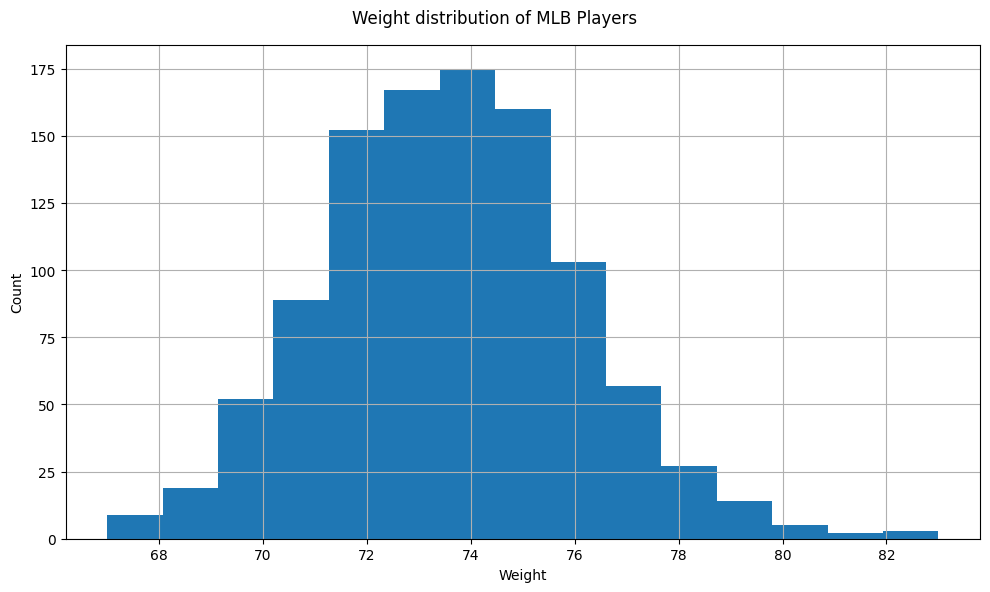

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## സാധാരണ വിതരണവും

നമ്മുടെ യഥാർത്ഥ ഡാറ്റയുമായി സമാനമായ ശരാശരി വ്യതിയാനമുള്ള സാധാരണ വിതരണത്തെ പിന്തുടരുന്ന ഭാരങ്ങളുടെ കൃത്രിമ സാമ്പിൾ സൃഷ്ടിക്കാം:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

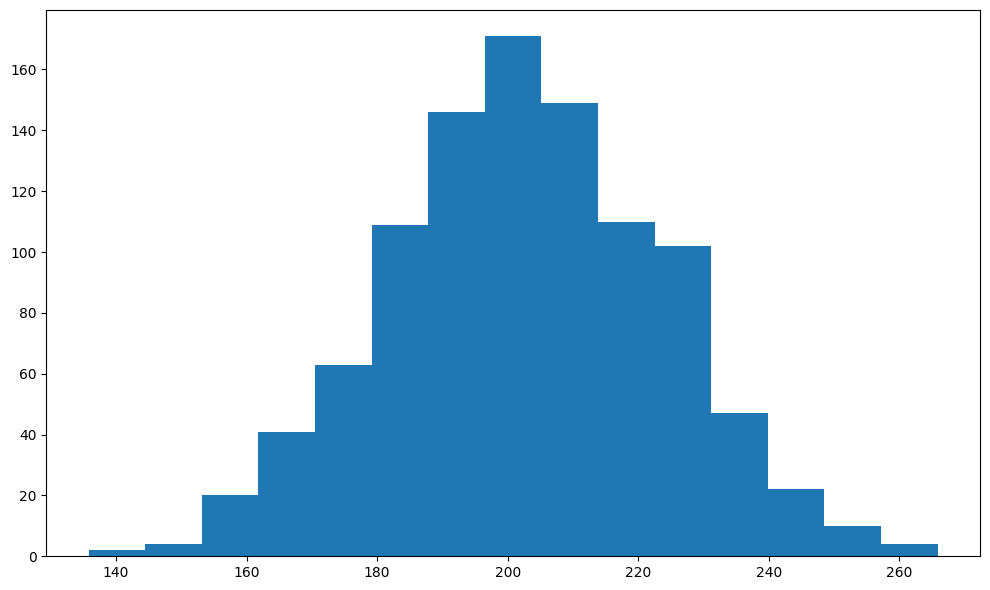

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

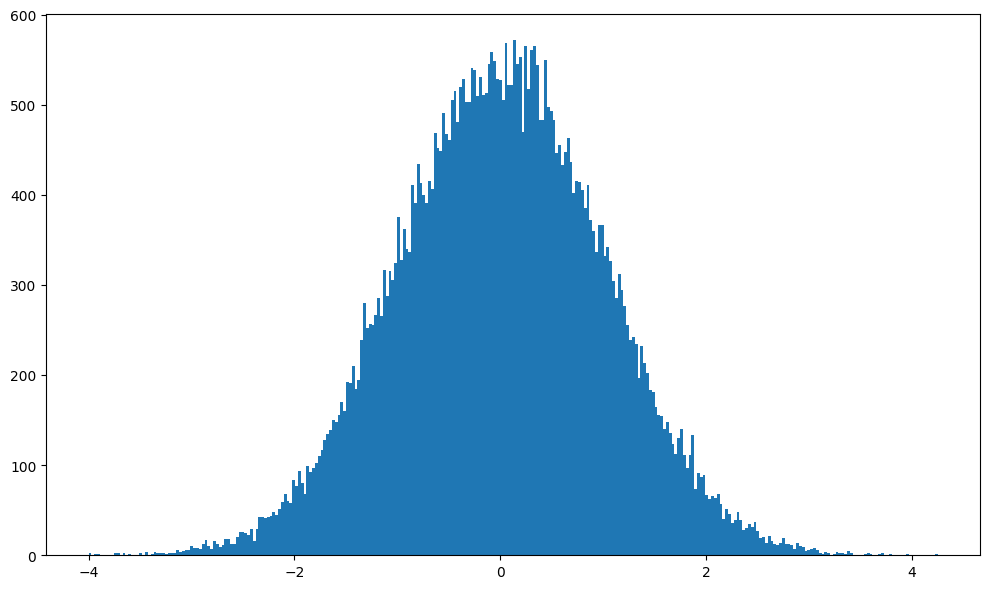

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

വാസ്തവ ജീവിതത്തിലെ മിക്ക മൂല്യങ്ങളും സാധാരണ വിതരണത്തിലുള്ളതിനാൽ, സാമ്പിൾ ഡാറ്റ സൃഷ്ടിക്കാൻ യൂണിഫോം റാൻഡം നമ്പർ ജനറേറ്റർ ഉപയോഗിക്കരുത്. യൂണിഫോം വിതരണത്തോടെ ( `np.random.rand` ഉപയോഗിച്ച് സൃഷ്ടിച്ചത്) ഭാരങ്ങൾ സൃഷ്ടിക്കാൻ ശ്രമിച്ചാൽ സംഭവിക്കുന്നത് ഇതാണ്:


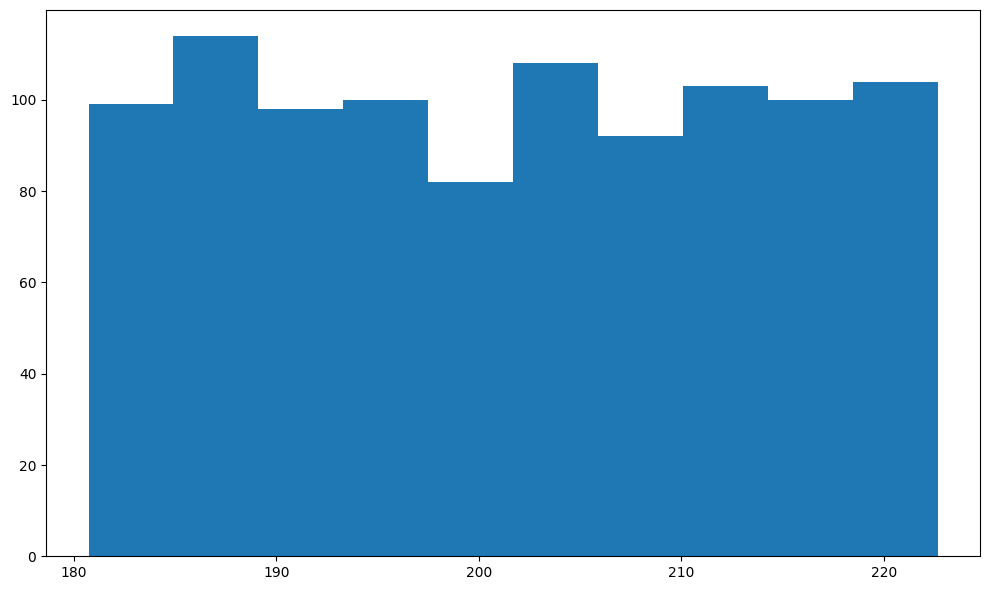

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## വിശ്വാസ അന്തരീക്ഷങ്ങൾ

ഇപ്പോൾ നാം ബേസ്ബോൾ കളിക്കാരുടെ ഭാരം, ഉയരം എന്നിവയ്ക്ക് വിശ്വാസ അന്തരീക്ഷങ്ങൾ കണക്കാക്കാം. നാം ഈ കോഡ് [ഈ സ്റ്റാക്ക് ഓവർഫ്ലോ ചർച്ചയിൽ നിന്നുള്ളത്](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data) ഉപയോഗിക്കും:


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## ഹൈപ്പോത്തസിസ് ടെസ്റ്റിംഗ്

നമ്മുടെ ബേസ്ബോൾ കളിക്കാരുടെ ഡാറ്റാസെറ്റിലെ വ്യത്യസ്ത പങ്കുകൾ പരിശോധിക്കാം:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

,Weight,Height,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.321267,221
Third_Baseman,73.044444,200.955556,45


നാം ആദ്യ ബേസ്മാന്മാർ രണ്ടാം ബേസ്മാന്മാരേക്കാൾ ഉയരം കൂടിയവരാണ് എന്ന ഹിപോത്തസിസ് പരിശോധിക്കാം. ഇതിന് ഏറ്റവും ലളിതമായ മാർഗം വിശ്വാസപരിധികൾ പരിശോധിക്കുകയാണ്:


In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


നാം കാണുന്നത് ഇടവേളകൾ ഒതുക്കപ്പെടുന്നില്ല.

ഒരു സാങ്കേതികമായി കൂടുതൽ ശരിയായ രീതിയിൽ ഹിപോത്തസിസ് തെളിയിക്കാൻ **സ്റ്റുഡന്റ് ടി-ടെസ്റ്റ്** ഉപയോഗിക്കാം:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` ഫംഗ്ഷൻ തിരികെ നൽകുന്ന രണ്ട് മൂല്യങ്ങൾ:
* p-മൂല്യം രണ്ട് വിതരണങ്ങൾക്കും ഒരേ ശരാശരി ഉണ്ടാകാനുള്ള സാധ്യതയായി പരിഗണിക്കാം. നമ്മുടെ കേസിൽ, ഇത് വളരെ കുറവാണ്, അതായത് ആദ്യ ബേസ്മാന്മാർ ഉയരത്തിൽ കൂടുതലാണെന്ന് ശക്തമായ തെളിവുകളുണ്ട്.
* t-മൂല്യം t-ടെസ്റ്റിൽ ഉപയോഗിക്കുന്ന സാധാരണപ്പെടുത്തിയ ശരാശരി വ്യത്യാസത്തിന്റെ ഇടനില മൂല്യമാണ്, ഇത് നൽകിയ ആത്മവിശ്വാസ മൂല്യത്തിന് വേണ്ടി ഒരു പരിധി മൂല്യവുമായി താരതമ്യം ചെയ്യപ്പെടുന്നു.


## സെൻട്രൽ ലിമിറ്റ് തിയോറം ഉപയോഗിച്ച് സാധാരണ വിതരണത്തിന്റെ സിമുലേഷൻ

Python-യിലെ പseudo-രാൻഡം ജനറേറ്റർ നമ്മുക്ക് യൂണിഫോം വിതരണമാണ് നൽകാൻ രൂപകൽപ്പന ചെയ്തിരിക്കുന്നത്. സാധാരണ വിതരണത്തിനുള്ള ഒരു ജനറേറ്റർ സൃഷ്ടിക്കാൻ ആഗ്രഹിക്കുന്നുവെങ്കിൽ, നാം സെൻട്രൽ ലിമിറ്റ് തിയോറം ഉപയോഗിക്കാം. സാധാരണ വിതരണമുള്ള മൂല്യം ലഭിക്കാൻ, നാം യൂണിഫോം-ജനറേറ്റഡ് സാമ്പിളിന്റെ ശരാശരി കണക്കാക്കും.


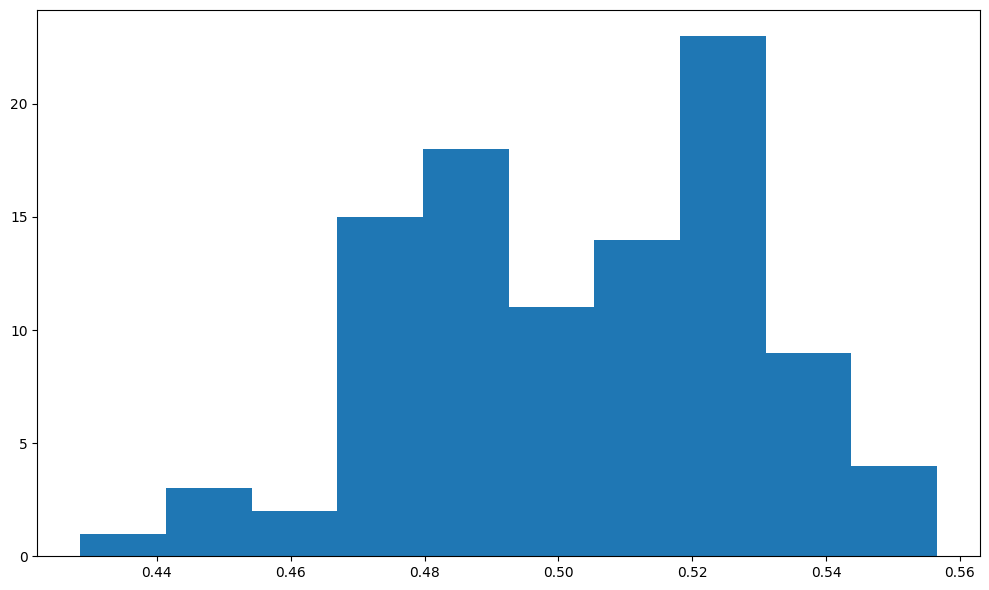

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlation and Evil Baseball Corp

Correlation allows us to find relations between data sequences. In our toy example, let's pretend there is an evil baseball corporation that pays its players according to their height - the taller the player is, the more money he/she gets. Suppose there is a base salary of $1000, and an additional bonus from $0 to $100, depending on height. We will take the real players from MLB, and compute their imaginary salaries:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


ഇപ്പോൾ ആ സീക്വൻസുകളുടെ കോവേറിയൻസ്‌വും കോറിലേഷനും കണക്കാക്കാം. `np.cov` നമുക്ക്所谓的 **കോവേറിയൻസ് മാട്രിക്സ്** നൽകും, ഇത് കോവേറിയൻസിന്റെ ബഹുവിവരങ്ങളിലേക്കുള്ള വിപുലീകരണമാണ്. കോവേറിയൻസ് മാട്രിക്സ് $M$-ന്റെ ഘടകം $M_{ij}$ ഇൻപുട്ട് വ്യത്യാസങ്ങളായ $X_i$ ഉം $X_j$ ഉം തമ്മിലുള്ള കോറിലേഷനാണ്, കൂടാതെ ഡയഗണൽ മൂല്യങ്ങൾ $M_{ii}$ $X_i$-ന്റെ വ്യത്യാസമാണ്. അതുപോലെ, `np.corrcoef` നമുക്ക് **കോറിലേഷൻ മാട്രിക്സ്** നൽകും.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


ഒരു സഹസംബന്ധം 1 ആണെങ്കിൽ, രണ്ട് ചാരങ്ങളിലുമുള്ള ശക്തമായ **രേഖീയ ബന്ധം** ഉണ്ടെന്ന് അർത്ഥമാക്കുന്നു. ഒരു മൂല്യം മറ്റൊന്നിനെതിരെ പ്ലോട്ട് ചെയ്ത് രേഖീയ ബന്ധം ദൃശ്യമായി കാണാം:


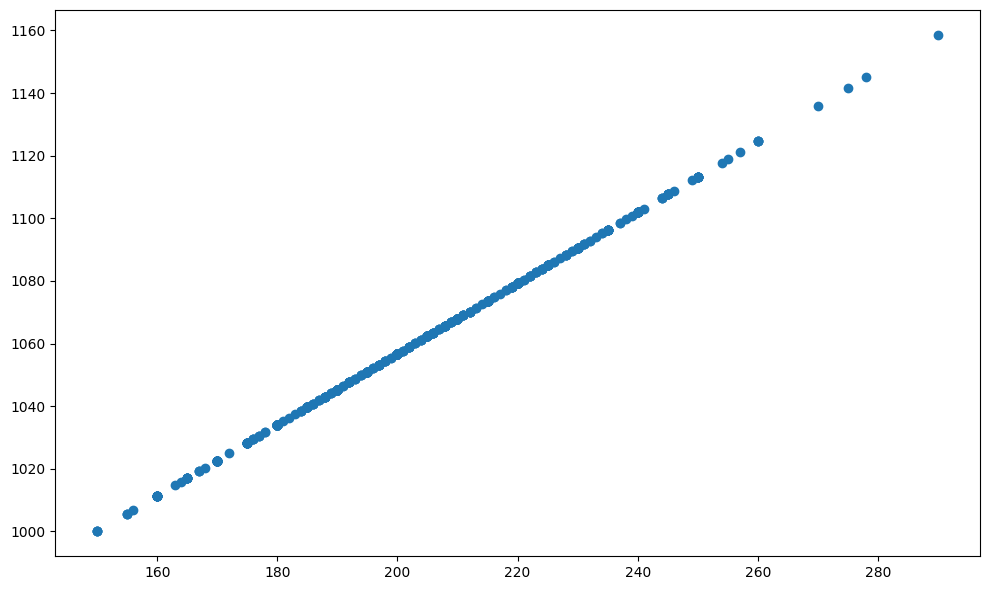

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

ബന്ധം രേഖീയമല്ലെങ്കിൽ എന്ത് സംഭവിക്കും എന്ന് നോക്കാം. ഉയരവും ശമ്പളവും തമ്മിലുള്ള വ്യക്തമായ രേഖീയ ആശ്രിതത്വം നമ്മുടെ കമ്പനി മറച്ചുവെക്കാൻ തീരുമാനിച്ചു എന്ന് കരുതുക, ഫോർമുലയിൽ `sin` പോലുള്ള ചില രേഖീയമല്ലാത്തത്വം ചേർത്തു:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


ഈ സാഹചര്യത്തിൽ, സഹസംബന്ധം കുറച്ച് ചെറുതാണ്, പക്ഷേ അത് ഇപ്പോഴും വളരെ ഉയർന്നതാണ്. ഇപ്പോൾ, ബന്ധം കൂടുതൽ വ്യക്തമാകാതിരിക്കാൻ, ശമ്പളത്തിൽ ചില യാദൃച്ഛിക വ്യത്യാസങ്ങൾ ചേർക്കാൻ ഞങ്ങൾ ആഗ്രഹിക്കാം. എന്ത് സംഭവിക്കുന്നു എന്ന് നോക്കാം:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


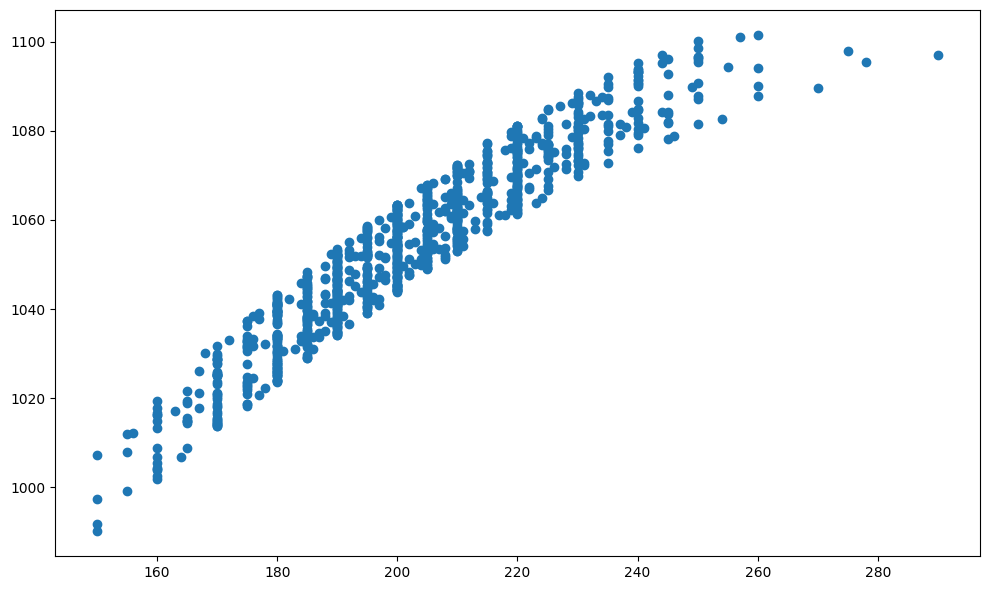

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> നിങ്ങൾക്ക് എന്തുകൊണ്ട് ഈ ഡോട്ടുകൾ ഈ രീതിയിൽ ലംബരേഖകളായി നിരത്തിയിരിക്കുന്നുവെന്ന് അനുമാനിക്കാമോ?

ശമ്പളമെന്ന കൃത്രിമമായി രൂപകൽപ്പന ചെയ്ത ആശയവും നിരീക്ഷിച്ച മാറ്റിയമായ *ഉയരം* തമ്മിലുള്ള ബന്ധം ഞങ്ങൾ കണ്ടു. ഉയരം, ഭാരം എന്നിവ പോലുള്ള രണ്ട് നിരീക്ഷിച്ച മാറ്റികൾ തമ്മിലും ബന്ധമുണ്ടോ എന്ന് നോക്കാം:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

ദുരിതകരമായി, നമുക്ക് യാതൊരു ഫലവും ലഭിച്ചില്ല - ചില അസാധാരണമായ `nan` മൂല്യങ്ങൾ മാത്രമാണ്. ഇത് സംഭവിക്കുന്നത് നമ്മുടെ സീരീസിലെ ചില മൂല്യങ്ങൾ നിർവചിക്കപ്പെട്ടിട്ടില്ലാത്തതിനാൽ, അവ `nan` ആയി പ്രതിനിധീകരിക്കപ്പെടുന്നു, ഇത് പ്രവർത്തനത്തിന്റെ ഫലവും നിർവചിക്കപ്പെടാത്തതാക്കുന്നു. മാട്രിക്സ് നോക്കിയാൽ `Weight` പ്രശ്നമുള്ള കോളമാണ്, കാരണം `Height` മൂല്യങ്ങൾ തമ്മിലുള്ള സ്വയം-സംബന്ധം കണക്കാക്കിയിട്ടുണ്ട്.

> ഈ ഉദാഹരണം **ഡാറ്റാ തയ്യാറെടുപ്പിന്റെയും** **ശുദ്ധീകരണത്തിന്റെയും** പ്രാധാന്യം കാണിക്കുന്നു. ശരിയായ ഡാറ്റ ഇല്ലാതെ നാം ഒന്നും കണക്കാക്കാൻ കഴിയില്ല.

നഷ്ടപ്പെട്ട മൂല്യങ്ങൾ പൂരിപ്പിക്കാൻ `fillna` മെത്തഡ് ഉപയോഗിച്ച്, ബന്ധം കണക്കാക്കാം:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

നിസ്സംശയം ഒരു ബന്ധമുണ്ട്, പക്ഷേ നമ്മുടെ കൃത്രിമ ഉദാഹരണത്തിലെ പോലെ ശക്തമായ ഒന്നല്ല. യഥാർത്ഥത്തിൽ, ഒരു മൂല്യത്തെ മറ്റൊന്നിനോട് എതിരായി കാണിക്കുന്ന സ്‌കാറ്റർ പ്ലോട്ട് നോക്കിയാൽ, ബന്ധം വളരെ കുറവായിരിക്കും:


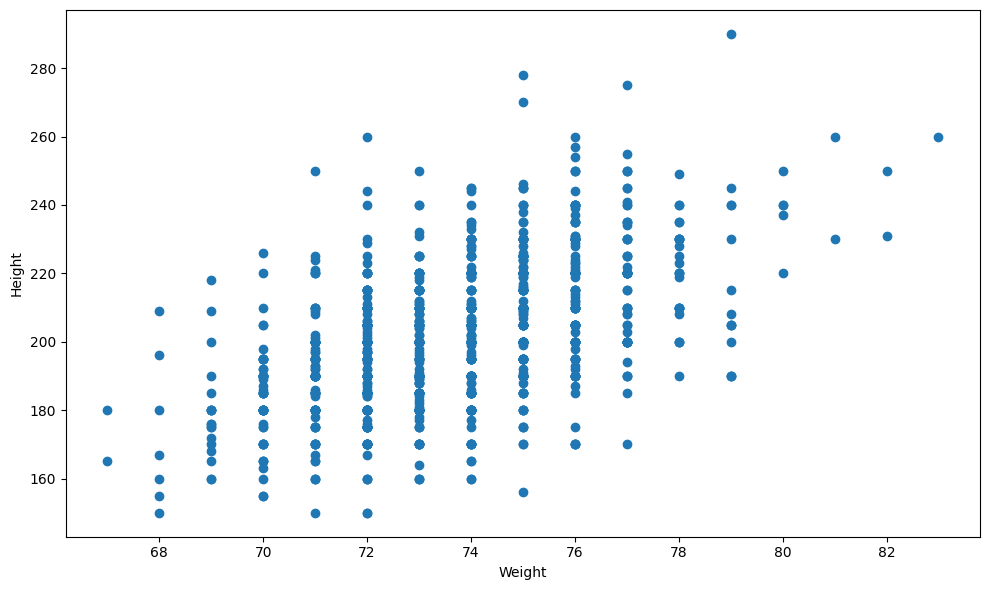

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## നിഗമനം

ഈ നോട്ട്‌ബുക്കിൽ നാം ഡാറ്റയിൽ അടിസ്ഥാന പ്രവർത്തനങ്ങൾ എങ്ങനെ നടത്താമെന്ന് പഠിച്ചു, സ്റ്റാറ്റിസ്റ്റിക്കൽ ഫംഗ്ഷനുകൾ കണക്കാക്കാൻ. ചില ഹിപോത്തസിസുകൾ തെളിയിക്കാൻ ഗണിതവും സ്റ്റാറ്റിസ്റ്റിക്സും ഉപയോഗിക്കുന്ന ഒരു ശക്തമായ ഉപകരണശാല എങ്ങനെ ഉപയോഗിക്കാമെന്ന് നമുക്ക് ഇപ്പോൾ അറിയാം, കൂടാതെ ഒരു ഡാറ്റാ സാമ്പിള്‍ നൽകിയപ്പോൾ യാദൃച്ഛിക ചാരങ്ങളിലേക്കുള്ള വിശ്വാസ അന്തരീക്ഷങ്ങൾ എങ്ങനെ കണക്കാക്കാമെന്നും.


---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**അസൂയാ**:  
ഈ രേഖ AI വിവർത്തന സേവനം [Co-op Translator](https://github.com/Azure/co-op-translator) ഉപയോഗിച്ച് വിവർത്തനം ചെയ്തതാണ്. നാം കൃത്യതയ്ക്ക് ശ്രമിച്ചിട്ടുണ്ടെങ്കിലും, സ്വയം പ്രവർത്തിക്കുന്ന വിവർത്തനങ്ങളിൽ പിശകുകൾ അല്ലെങ്കിൽ തെറ്റുകൾ ഉണ്ടാകാമെന്ന് ദയവായി ശ്രദ്ധിക്കുക. അതിന്റെ മാതൃഭാഷയിലുള്ള യഥാർത്ഥ രേഖ പ്രാമാണികമായ ഉറവിടമായി കണക്കാക്കണം. നിർണായകമായ വിവരങ്ങൾക്ക്, പ്രൊഫഷണൽ മനുഷ്യ വിവർത്തനം ശുപാർശ ചെയ്യപ്പെടുന്നു. ഈ വിവർത്തനം ഉപയോഗിക്കുന്നതിൽ നിന്നുണ്ടാകുന്ന ഏതെങ്കിലും തെറ്റിദ്ധാരണകൾക്കോ തെറ്റായ വ്യാഖ്യാനങ്ങൾക്കോ ഞങ്ങൾ ഉത്തരവാദികളല്ല.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
